In [1]:
import pandas as pd

In [10]:
caminho = "c:/Users/Felipe/Documents/GitHub/pythonstat/ex_regressao_outros/"

In [53]:
Adv = pd.read_csv(caminho+'/Advertising.csv', index_col=0)

Por = pd.read_csv(caminho+'Portland_housePrices.csv', index_col=None)

In [20]:
/display Por.head(3)

/display Adv.head(3)

;print \nverificado se os datasets estão OK

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3



verificado se os datasets estão OK


In [219]:
def seriesToSingleDataFrame(data, coluna): return data.loc[:,[coluna]]

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2.0).sum())

def norm(vetor): return vetor/float(vetor.max())

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from pylab import *

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R²).

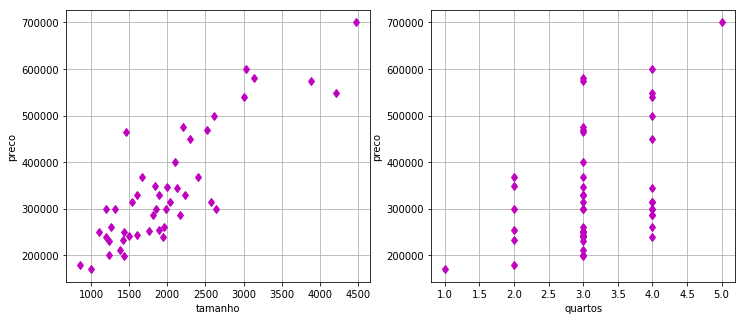

In [47]:
figure(figsize=[12,5])
subplot(1,2,1)
plot(Por.tamanho.values, Por.preco.values, 'dm'); grid()
xlabel(Por.tamanho.name); ylabel(Por.preco.name);

subplot(1,2,2)
plot(Por.quartos.values, Por.preco.values, 'dm'); grid()
xlabel(Por.quartos.name); ylabel(Por.preco.name);

In [79]:
k=2

neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform')

porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porPrecoD = seriesToSingleDataFrame(Por,'preco')

neigh.fit(porTamanhoD,porPrecoD)

precoPredict = neigh.predict(porTamanhoD)

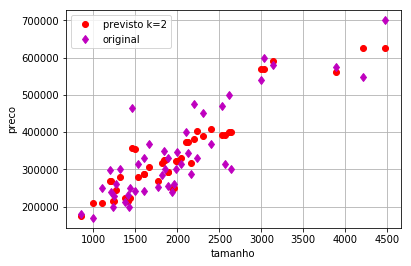

In [86]:
plot(Por.tamanho.values, precoPredict, 'or', label="previsto k=" + str(k));  
plot(Por.tamanho.values, Por.preco.values, 'dm', label="original");  
xlabel(Por.tamanho.name); ylabel(Por.preco.name); grid();legend();

In [85]:
calc_rss( norm(Por.preco.values), norm(precoPredict.flatten()))

14.386636778832823

In [152]:
def KnnGeraRss(k, dataset, colunaA, colunaY, peso='uniform'):
    
    neigh = KNeighborsRegressor(n_neighbors=k,weights=peso)

    X = seriesToSingleDataFrame(dataset,colunaA)
    Y = seriesToSingleDataFrame(dataset,colunaY)

    neigh.fit(X,Y)

    Predict = neigh.predict(X)

    return calc_rss( norm(dataset[colunaY].values), norm(Predict.flatten()))
    

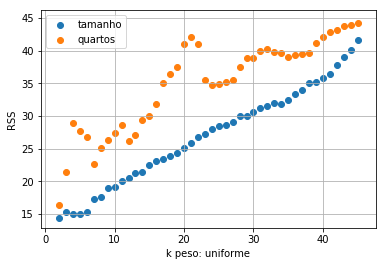

In [158]:
kmax =Por.preco.count()
           
otimizaknnPorTam = np.array([ [x,KnnGeraRss(x,Por,'tamanho', 'preco')] for x in range(2,kmax-1)])
otimizaknnPorQua = np.array([ [x,KnnGeraRss(x,Por,'quartos', 'preco')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorTam.T, label="tamanho"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorQua.T, label="quartos"); xlabel("k peso: uniforme"); ylabel("RSS") ;legend(); grid()

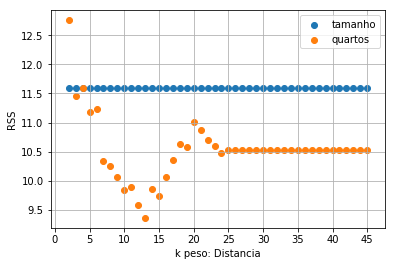

In [174]:
kmax =Por.preco.count()
           
otimizaknnPorTam = np.array([ [x,KnnGeraRss(x,Por,'tamanho', 'preco', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorQua = np.array([ [x,KnnGeraRss(x,Por,'quartos', 'preco', peso='distance')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorTam.T, label="tamanho"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorQua.T, label="quartos"); xlabel("k peso: Distancia"); ylabel("RSS") ;legend(); grid()
xticks(range(0,kmax,5));

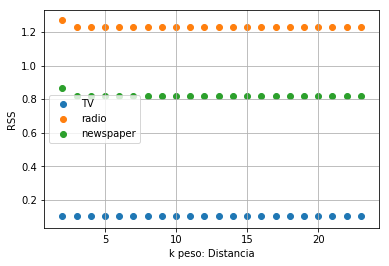

In [227]:
kmax = Adv.sales.count()/8
           
otimizaknnPorA = np.array([ [x,KnnGeraRss(x,Adv,'TV', 'sales', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorB = np.array([ [x,KnnGeraRss(x,Adv,'radio', 'sales', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorC = np.array([ [x,KnnGeraRss(x,Adv,'newspaper', 'sales', peso='distance')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorA.T, label="TV"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorB.T, label="radio"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorC.T, label="newspaper"); xlabel("k peso: Distancia"); ylabel("RSS") ;legend(); grid()

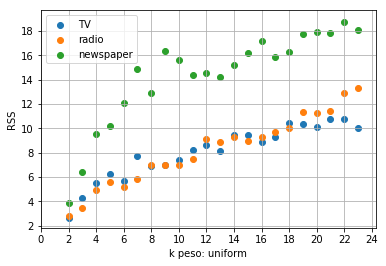

In [228]:
kmax = Adv.sales.count()/8
           
otimizaknnPorA = np.array([ [x,KnnGeraRss(x,Adv,'TV', 'sales')] for x in range(2,kmax-1)])
otimizaknnPorB = np.array([ [x,KnnGeraRss(x,Adv,'radio', 'sales')] for x in range(2,kmax-1)])
otimizaknnPorC = np.array([ [x,KnnGeraRss(x,Adv,'newspaper', 'sales')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorA.T, label="TV"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorB.T, label="radio"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorC.T, label="newspaper"); xlabel("k peso: uniform"); ylabel("RSS") ;legend(); grid()
xticks(range(0,kmax,2));

In [198]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
    
porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porQuartoD = seriesToSingleDataFrame(Por,'quartos')
porPrecoD = seriesToSingleDataFrame(Por,'preco')
    
# fit the regressor with X and Y data 
tree.fit(porTamanhoD, porPrecoD) ;

In [181]:
from sklearn.tree import export_graphviz  
 
export_graphviz(tree, out_file =caminho+'tree.dot', 
               feature_names =['Tamanho'])

0.0
1.0523787199


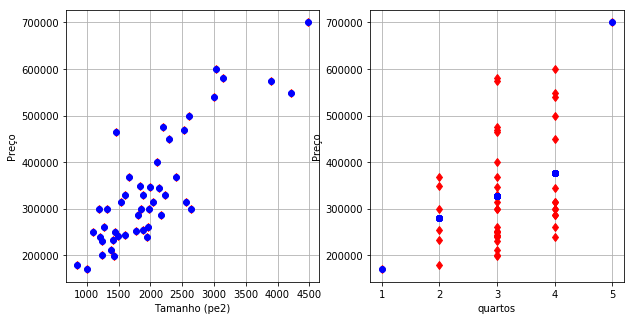

In [226]:

figure(figsize=[10,5])
subplot(1,2,1)

plot(porTamanhoD, porPrecoD,"dr")

tree.fit(porTamanhoD, porPrecoD) ;
y_t = tree.predict(porTamanhoD)

plot(porTamanhoD, y_t, 'ob');grid()


xlabel('Tamanho (pe2)');
ylabel(u'Preço');

print calc_rss(norm(Por.preco.values), norm(y_t.flatten()) )

subplot(1,2,2)
plot(porQuartoD, porPrecoD,"dr"); 

tree.fit(porQuartoD, porPrecoD) ;
y_t = tree.predict(porQuartoD)

plot(porQuartoD, y_t, 'ob')

xlabel(u'quartos');
ylabel(u'Preço'); grid(True)

print calc_rss(norm(Por.preco.values), norm(y_t.flatten()) )

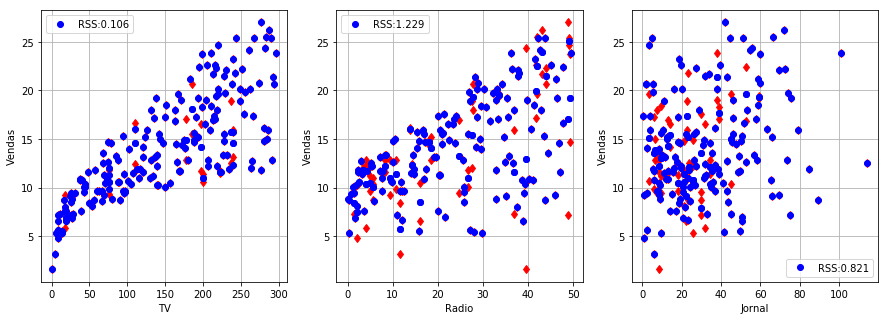

In [263]:
figure(figsize=[15,5])
subplot(1,3,1)

advTVD = seriesToSingleDataFrame(Adv, 'TV')
advRadioD = seriesToSingleDataFrame(Adv, 'radio')
advJornalD = seriesToSingleDataFrame(Adv, 'newspaper')
advSalesD = seriesToSingleDataFrame(Adv, 'sales')

plot(advTVD, advSalesD,"dr")
 
tree.fit(advTVD, advSalesD) ;

y_t = tree.predict(advTVD)

plot(advTVD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )

xlabel('TV'); ylabel(u'Vendas');  grid(); legend()

subplot(1,3,2)

plot(advRadioD, advSalesD,"dr"); 

tree.fit(advRadioD, advSalesD) ;
y_t = tree.predict(advRadioD)

plot(advRadioD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )
xlabel(u'Radio');
ylabel(u'Vendas'); grid(True); legend()

subplot(1,3,3)

plot(advJornalD, advSalesD,"dr"); 

tree.fit(advJornalD, advSalesD) ;
y_t = tree.predict(advJornalD)

plot(advJornalD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )

xlabel(u'Jornal');
ylabel(u'Vendas'); grid(True); legend(loc='lower right');



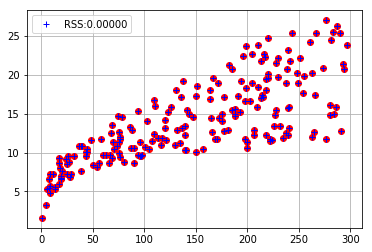

In [290]:
AdvCampos = Adv.drop(columns=['sales'])

advTVD = seriesToSingleDataFrame(Adv, 'TV')
advRadioD = seriesToSingleDataFrame(Adv, 'radio')
advJornalD = seriesToSingleDataFrame(Adv, 'newspaper')
advSalesD = seriesToSingleDataFrame(Adv, 'sales')

#plot(advTVD, advSalesD,"dr")
 
tree.fit(AdvCampos, advSalesD) ;

y_t = tree.predict(AdvCampos)

plot(advTVD, advSalesD, "or")

plot(advTVD, y_t, '+b', label = "RSS:{0:.5f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) );

legend(); grid()

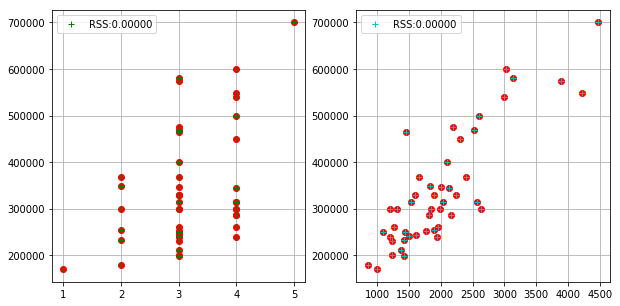

In [316]:
figure(figsize=[10,5])

porCampos = Por.drop(columns=['preco'])
porPreco = seriesToSingleDataFrame(Por, 'preco')

porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porQuartoD = seriesToSingleDataFrame(Por,'quartos')
porPrecoD = seriesToSingleDataFrame(Por,'preco')


#plot(advTVD, advSalesD,"dr")
 
tree.fit(PorCampos, porPreco) ;

y_t = tree.predict(porCampos)

subplot(1,2,1)
plot(porQuartoD, porPreco, "or")
plot(porQuartoD, y_t, '+g', label = "RSS:{0:.5f}".format( calc_rss(norm(Por.preco.values), norm(y_t.flatten()) ) ) );
legend(); grid()

subplot(1,2,2)
plot(porTamanhoD, porPreco, "or")
plot(porTamanhoD, y_t, '+c', label = "RSS:{0:.5f}".format( calc_rss(norm(Por.preco.values), norm(y_t.flatten()) ) ) );
legend(); grid()

### Ex 3

In [328]:
primeiros30 = int(Por.preco.count()*0.3)

In [334]:
PorTeste = Por.loc[0: primeiros30]
PorTreino = Por.loc[primeiros30::]

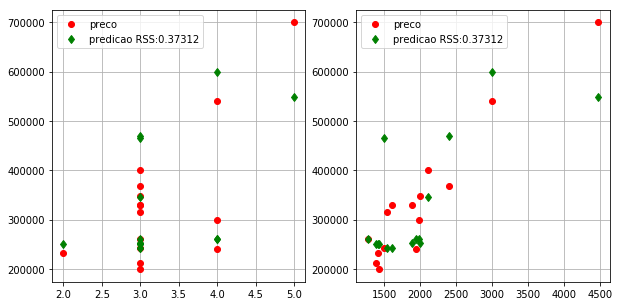

In [361]:
figure(figsize=[10,5])

porCamposTreino = PorTreino.drop(columns=['preco'])
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')
porCamposTeste = PorTeste.drop(columns=['preco'])

X = porCamposTreino
Y = porPrecoTreino

tree.fit(X, Y) ;

y_t = tree.predict(porCamposTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.quartos, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid()

subplot(1,2,2)
plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid()



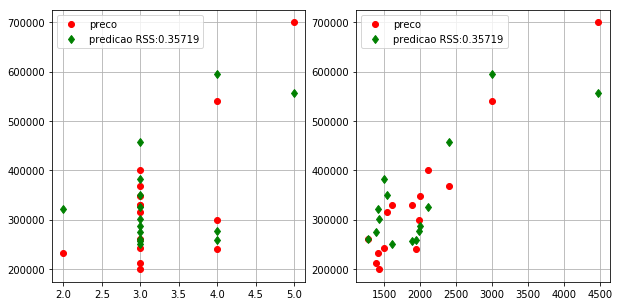

In [370]:
figure(figsize=[10,5])

porCamposTreino = PorTreino.drop(columns=['preco'])
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')
porCamposTeste = PorTeste.drop(columns=['preco'])

X = porCamposTreino
Y = porPrecoTreino

neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(porCamposTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.quartos, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid()

subplot(1,2,2)
plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid() 

In [373]:
primeiros30 = int(Adv.sales.count()*0.3)

AdvTeste = Adv.loc[0:primeiros30]
AdvTreino = Adv.loc[primeiros30::]

In [374]:
figure(figsize=[10,5])

AdvCamposTreino = AdvTreino.drop(columns=['sales'])
AdvSalesTreino = seriesToSingleDataFrame(AdvCamposTreino, 'sales')
AdvCamposTeste = PorTeste.drop(columns=['sales'])

X = AdvCamposTreino
Y = AdvSalesTreino

neigh = KNeighborsRegressor(n_neighbors=2, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(AdvCamposTeste)

subplot(1,2,1)
plot(AdvCamposTeste.  , PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.quartos, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid()

subplot(1,2,2)
plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

legend(); grid() 

KeyError: u"None of [Index([u'sales'], dtype='object')] are in the [columns]"

<Figure size 720x360 with 0 Axes>